<a href="https://colab.research.google.com/github/KaiaX926/P-MNIST-milestone/blob/main/5241_project_0421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Deep learning

In [39]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [40]:
import time
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import trange
from time import sleep
import seaborn as sns

In [166]:
def errorrate(y_pred, y_true):
    error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
    return error/len(y_true)

def CrossEntropy(y_pred, y_true):
    if y_true == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)
    return mean_bce_loss

In [42]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)#.to(device)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)#.to(device)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


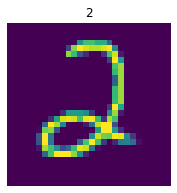

In [43]:
import matplotlib.pyplot as plt
X_test = test_data . test_data . numpy ()
Y_test = test_data . test_labels . numpy ()
image_idx = np.random.choice(range(X_test.shape[0]))
image = X_test[image_idx]
image_class = Y_test[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_test[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

In [44]:
# Define the model
# import libraries
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_1 = 100
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.output = nn.Linear(hidden_1, 10)

        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add output layer
        x = self.output(x)
        return x

# initialize the NN
model_1 = Net()
model_1 = model_1.to(device)
# model.cuda()
print(model_1)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


In [156]:
def tt(seed, model, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)
    model = Net()
    model = model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    model.train() 
    LOSS, train_ACC, test_ACC  = [],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))
        
        name = f"/content/{seed}_model.pt"
        model_scripted = torch.jit.script(model) # Export to TorchScript
        model_scripted.save(name)  
        
    return train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

In [78]:
def draw_path(trial, subs, n_epochs, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*6, 5))
    fig.suptitle('NN - 1 hidden layer')
    for i in range(len(trial)):
        # ax = 
        axes[i].set_title(trial[i])
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        # ax = ax.twinx()
        # axes[i] = plt.twinx()
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = test_acc[i], label='test')

In [72]:
def draw_path_avg(n_epochs, train_acc, test_acc):
    train_acc_avg = np.mean(train_acc, axis=0)
    test_acc_avg = np.mean(test_acc, axis=0)

    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    fig.suptitle('NN - 1 hidden layer - mean misclassification error v.s. iteration')
    sns.lineplot( x = list(range(n_epochs)), y = train_acc_avg, color = 'orange', label='train')
    sns.lineplot( x = list(range(n_epochs)), y = test_acc_avg, label='test')


## 3.(a)
How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

In [157]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc, test_acc = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    train_ACC, test_ACC = tt(seed, model_1)
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)


New trial: 100%|██████████| 5/5 [02:19<00:00, 27.94s/it]


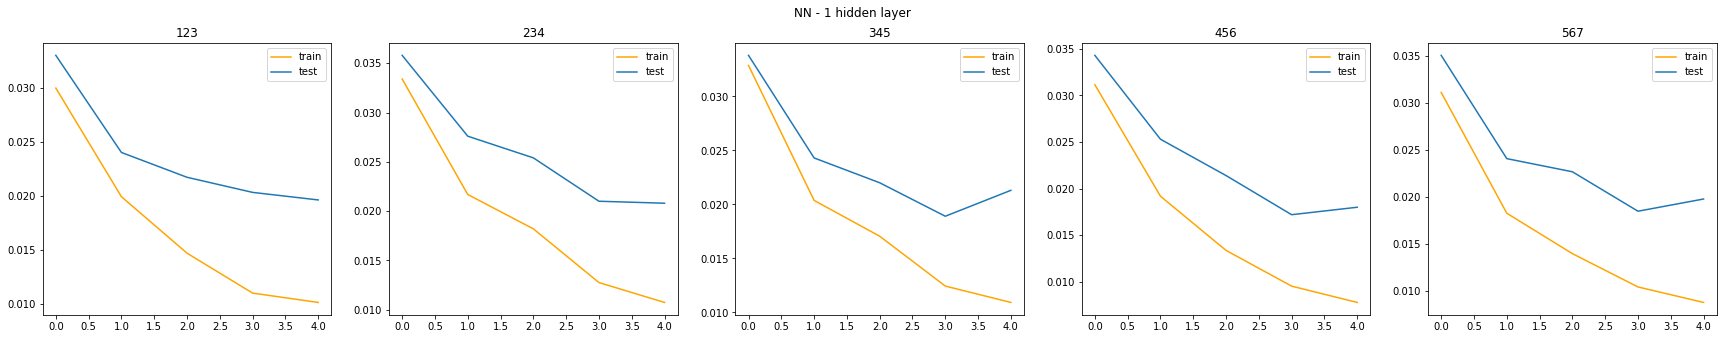

In [158]:
draw_path(trial, 5, n_epochs, train_acc, test_acc)

A: 

## 3.(b)
We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error.
Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

In [48]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [49]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    for i in range(len(target)):
        loss += target
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [50]:
# n_epochs = 5
# cnn1_accuracy_summary = []
# train_acc, test_acc = [],[]
# lr = 0.1

# trial = [123,234,345,456,567]
# for seed in trial:
#     train_ACC, test_ACC = tt(seed, model_1, miss_classification_loss)
#     train_acc.append(train_ACC)
#     test_acc.append(test_ACC)

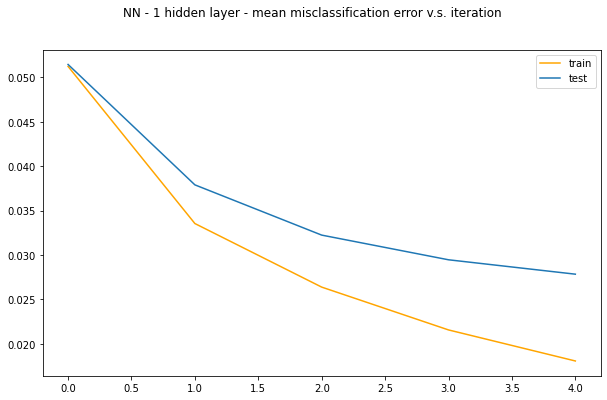

In [73]:
draw_path_avg(n_epochs, train_acc, test_acc)

## 3.(c)
Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

In [52]:
# Pick the best model
model_best = torch.jit.load('123_model.pt')
model_best.eval()

RecursiveScriptModule(
  original_name=Net
  (fc1): RecursiveScriptModule(original_name=Linear)
  (output): RecursiveScriptModule(original_name=Linear)
)

In [53]:
list(model_best.children())

[RecursiveScriptModule(original_name=Linear),
 RecursiveScriptModule(original_name=Linear)]

In [54]:
model_weights = [] 
conv_layers = [] 
model_children = list(model_best.children())

# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    model_weights.append(model_children[i].weight.detach().cpu().numpy())
    conv_layers.append(model_children[i])

#print(f"Total convolutional layers: {counter}")

In [55]:
model_weights[0][0].shape

(784,)

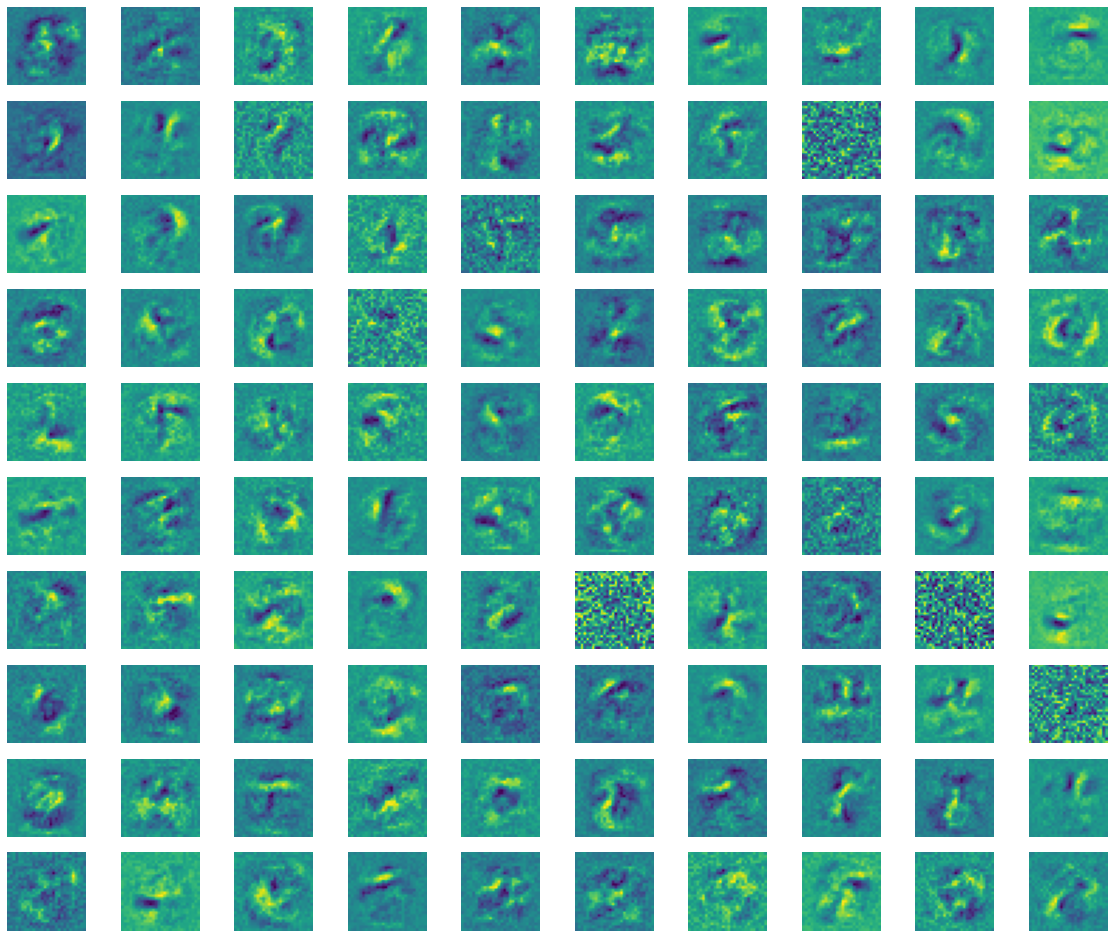

In [56]:
# visualize the first conv layer filters
model_weights = model_weights[:-1]
plt.figure(figsize=(20, 17))
for layer in model_weights:
    for i in range(len(layer)):
        plt.subplot(10, 10, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
        filter = layer[i].reshape(28,28)
        plt.imshow(filter, cmap='viridis')
        plt.axis('off')
        # plt.savefig('filter1.png')
    plt.show()

## 3.(d)
Try different values of the learning rate. You should start with a learning rate of 0.1. You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the convergence properties of the algorithm (looking at both average cross entropy and % incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence rate? How would you choose the best value of these parameters?

In [175]:
def tt_lr(lr, monm, model, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)
    model = Net()
    model = model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=monm)

    model.train() 
    LOSS, train_ACC, test_ACC, train_ENTROPY, test_ENTROPY  = [],[],[],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error, train_entropy = 0,0
        for traindata, traintarget in train_loader:
            loss = nn.CrossEntropyLoss()
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred_g = torch.max(output, 1)
            pred = pred_g.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)
        

        test_error, test_entropy = 0, 0
        for testdata, testtarget in test_loader:
            loss = nn.CrossEntropyLoss()
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred_g = torch.max(output, 1)
            pred = pred_g.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))
        
        name = f"/content/{lr}_{monm}_model.pt"
        model_scripted = torch.jit.script(model) # Export to TorchScript
        model_scripted.save(name)  
        
    return LOSS, train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

In [176]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 234 # the best

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
for i in range(len(opti_groupsLR)):
    LOSS, train_ACC, test_ACC = tt_lr(opti_groupsLR[i][0], opti_groupsLR[i][1], model_1)
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)


New trial: 100%|██████████| 5/5 [02:19<00:00, 27.98s/it]


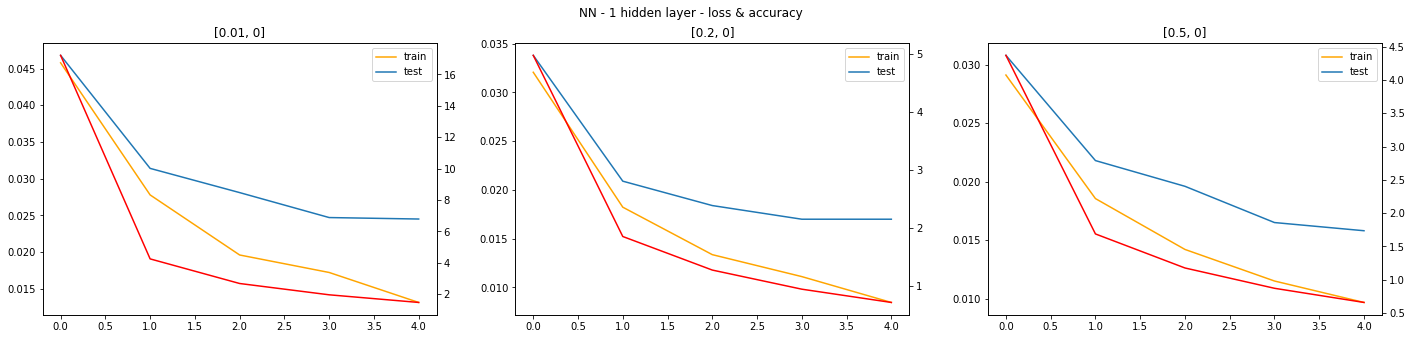

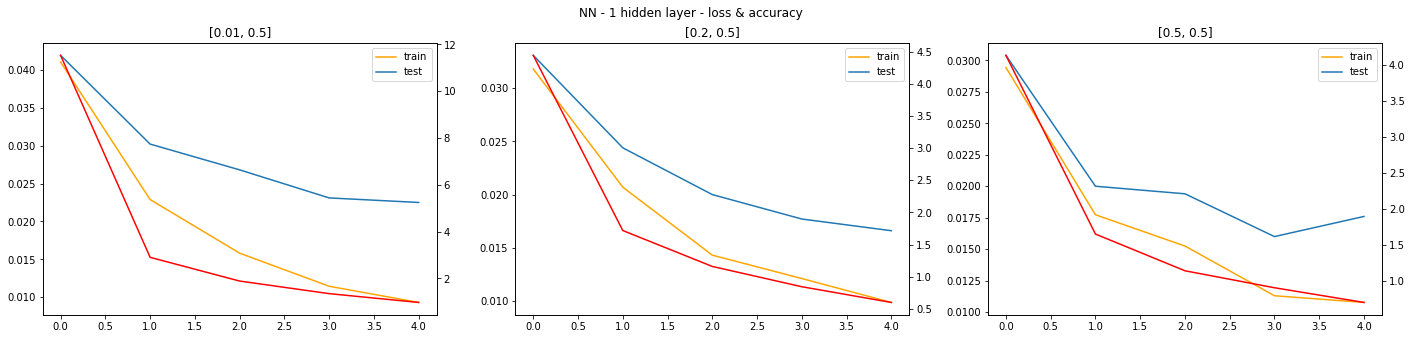

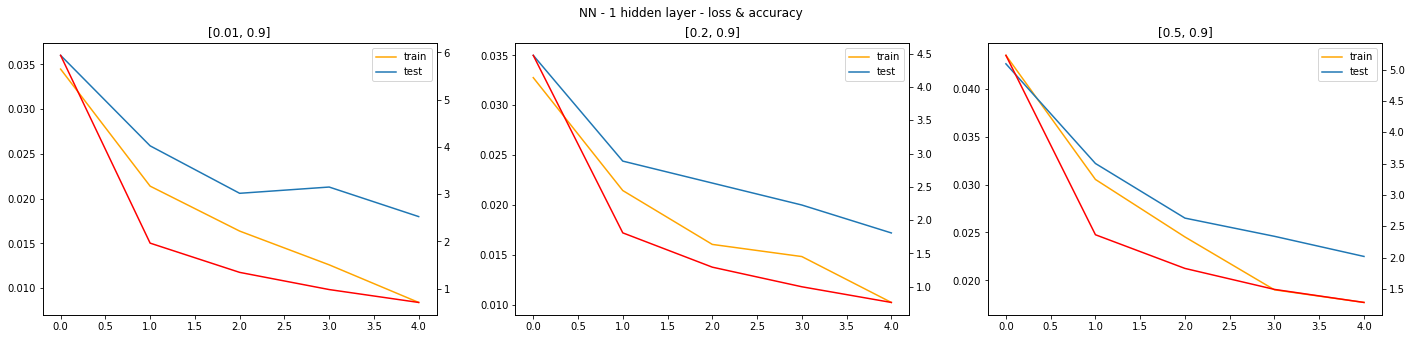

In [203]:
def draw_path_entropy(trial, subs, n_epochs, loss_groups, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*8, 5))
    fig.suptitle('NN - 1 hidden layer - loss & accuracy')
    for i in range(len(trial)):
        ax = axes[i]
        axes[i].set_title(trial[i])
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = test_acc[i], label='test')
        
        axes2 = ax.twinx()
        sns.lineplot(ax=axes2, x = list(range(n_epochs)), y = loss_groups[i], color = 'red')

for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])


## 4. 
Redo part 3(a) - 3(d) with a CNN i.e. with one 2-D convolutional layers → Relu activation → Maxpooling with appropriate hyperparameters. Compare the best result from the single layer neural network and the CNN, what could you conclude?

In [132]:
# Define the model2
# import libraries
# [20, 1, 28, 28]
# N -> the batch size
# C -> Nb of channels
# H -> Height
# W -> Width

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1,6,5, padding = 2)
        self.out = nn.Linear(6 * 14 * 14, 10)

    def forward(self, x):
        # flatten image input
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.out(x)

        return x

# initialize the NN
model_2 = Net()
model_2 = model_2.to(device)
# model.cuda()
print(model_2)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (out): Linear(in_features=1176, out_features=10, bias=True)
)


In [133]:
train_ACC_conv1, test_ACC_conv1 = tt(234, model_2)

New trial: 100%|██████████| 5/5 [01:13<00:00, 14.66s/it]


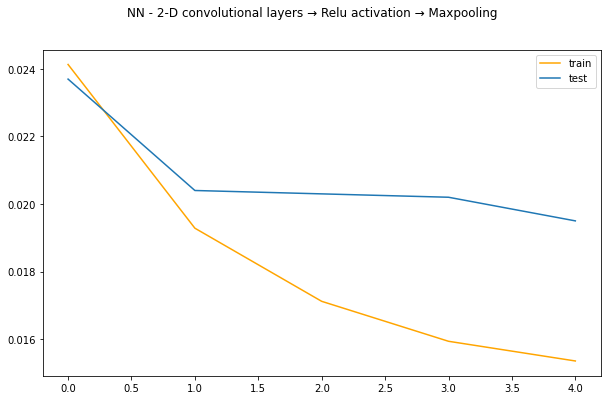

In [134]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('NN - 2-D convolutional layers → Relu activation → Maxpooling')
sns.lineplot( x = list(range(n_epochs)), y = train_ACC_conv1, color = 'orange', label='train')
sns.lineplot( x = list(range(n_epochs)), y = test_ACC_conv1, label='test')


A: The performance of CNN is way better than single layer neural network

In [168]:
np.log([1,0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([  0., -inf,   0.])

# 5.
In this part, you are working with train.txt, val.txt and test.txt. In particular, train.txt contains 20,000 lines and val.txt and test.txt contains 5000 lines in the same format. Each line contains 1569 coordinates, with the first 784 real-valued numbers correspond to the 784 pixel values for the first digit, next 784 real valued numbers correspond to the pixel values for the second digit.
